# Advanced Computer Vision
How to map out the lane on an image of the road? 
##### Steps
 1. Camera calibration
 2. Distortion correction
 3. Color/Gradient threshold
 4. Perspective transform
 5. Detect lane lines
 6. Determine the lane curvature

### Detail of pipeline steps
**Camera Calibration**
compute the camera calibration matrix & distortion coefficients (only once).

**Distortion Correction**
apply calibrated value each new frame.

**Thresholding**
To generate a binary image where the lane lines are clearly visible. Try out various combinations of color and gradient thresholds.

**Perspective Transform**
To identify four source points for prespective transform. In this case, can assume the road is a flat plane. This isn't strictly true, but it can serve as an approximation for this task.
The easiest way to do this is to investigate an image where the lane lines are straight, and find four points lying along the lines that, after perspective transform, make the lines look straight and vertical from a bird's eye view perspective.

Those same four source points will now work to transform any image (again, under the assumption that the road is flat and the camera perspective hasn't changed).

## Finding the lines: Histogram Peaks
Now I have a thresholded warped image and ready to map out the lane lines. There are many ways, but here's one example of how I might do it.

### Line Finding Method: Peaks in a Histogram
I need to decide explicitly which pixels are part of the lines and which belong to the left line and which belong to the right line. Plotting a histgram of where the binary activations occur across the image is one potential solution for this.

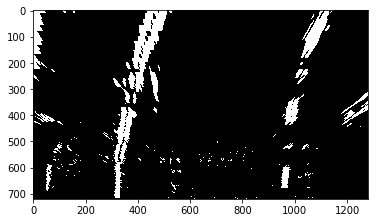

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/warped-example.jpg')/255
plt.imshow(img, cmap='gray')

In [5]:
def hist(img):
    bottom_half = img[img.shape[0]//2:, :]
    histogram = np.sum(bottom_half, axis=0)
    return histogram

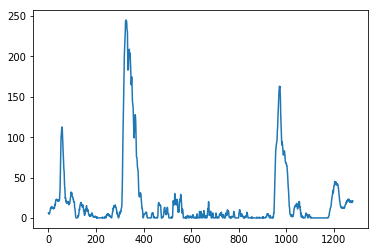

In [7]:
histogram = hist(img)
plt.plot(histogram)